In [2]:
!pip install xgboost

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

# XGBoost Classifier

In [5]:
wine = datasets.load_wine()

In [6]:
df = pd.DataFrame(wine['data'], columns = wine['feature_names'])
df['target'] = wine['target']

In [7]:
df_train,df_test = train_test_split(df, test_size=0.2, random_state=0)

In [8]:
dtrain = xgb.DMatrix(
    df_train.loc[:, df_train.columns !='target'], label=df_train['target']
)

dtest = xgb.DMatrix(
    df_test.loc[:, df_test.columns !='target'], label=df_test['target']
)

In [9]:
param = {'max_depth': 5, 'eta': 0.1, 'objective': 'multi:softmax', 'num_class':3}
num_round = 100
bst = xgb.train(param, dtrain, num_round)

In [10]:
preds = bst.predict(dtest)

In [11]:
accuracy_score(df_test['target'], preds)

0.9444444444444444

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

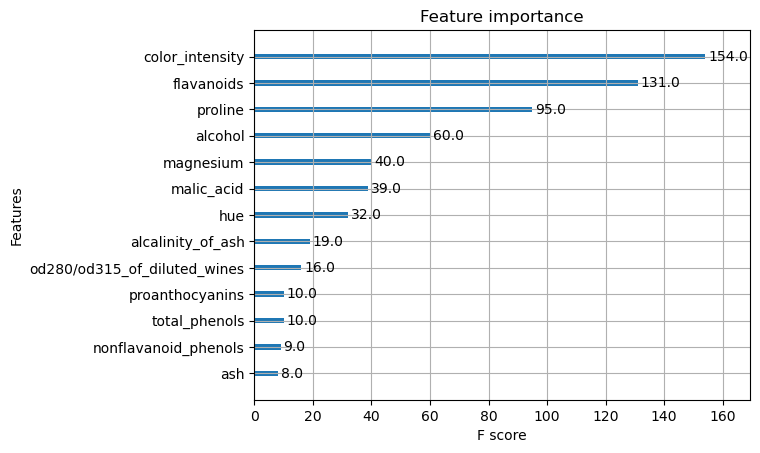

In [12]:
xgb.plot_importance(bst)